# Introduction to Feature Vectors, Data Matrices, and  Probability

<font color=green>__Vector:__</font> A vector is a sequence of values. For our purposes, these values may be categorical data, discrete numeric data, or continuous numeric data. In our examples, we will often use integers to make it easy. Vectors should be handwritten with a little arrow over them or typed in bold.

<font color=green>__Review:__</font> What is a sequence? What are categorical, discrete, and continuous data? How do we plot discrete data? Categorical data? What kind of probability distribution function is associated with discrete data? With continuous data?

<font color=green>__Row vector:__</font> A row vector is written horizontally:<br>
  $\pmb{x_{1}} = \begin{bmatrix} 2 & -1 & 5 \end{bmatrix}$
  
  $ \pmb{x_{1,0}} = 2 $

<font color=green>__Column vector:__</font> A column vector is written vertically:<br>
$\pmb{x_{2}} = \begin{bmatrix} 2 \\ -1 \\ 5 \end{bmatrix}$

<font color=green>__Review:__</font> What is the relationship between $\pmb{x_{1}}$ and $\pmb{x_{2}}$ and how do we write it?
**Answer:** transpose: $\pmb{x_1^T}$

Does $\pmb{x_1} + \pmb{x_2}$ make sense? No, but $\pmb{x_1} + \pmb{x_2^T} = [4, -2, 10]$

### Vocab

<font color=green>__Instance/observation:__</font> An instance is all of the data we know about a single object/individual.

<font color=green>__Prediction:__</font> Attempt to estimate, guess, or predict the value of a "target" variable based on the value(s) of one or more "predictor" variables. Not necessarily a statement about the future.

<font color=green>__Machine learning:__</font> An approach to prediction: we set up a computer program representing a mathematical model, and then "train" the model by allowing it to see some data where the correct prediction is known.

<font color=green>__Training data:__</font> Data we use to train or adjust a machine learning model. Usually this is data where we know the correct value of the target variable for each instance.

<font color=green>__Feature/attribute:__</font> Features are variables describing an instance that are used to make the predictions of the target variables. (Think of these as "inputs" to the model, and the target variable as the "output"). Another term for these variables is "predictor".

<font color=green>__Feature vector:__</font> A vector containing all the values of the features for a single instance.

# Let's Look at Some Data

We have the csv file `books001.csv` that contains some of the book data that you collected yesterday. In a spreadsheet program it looks like this:
![books_image.png](books_image.png)
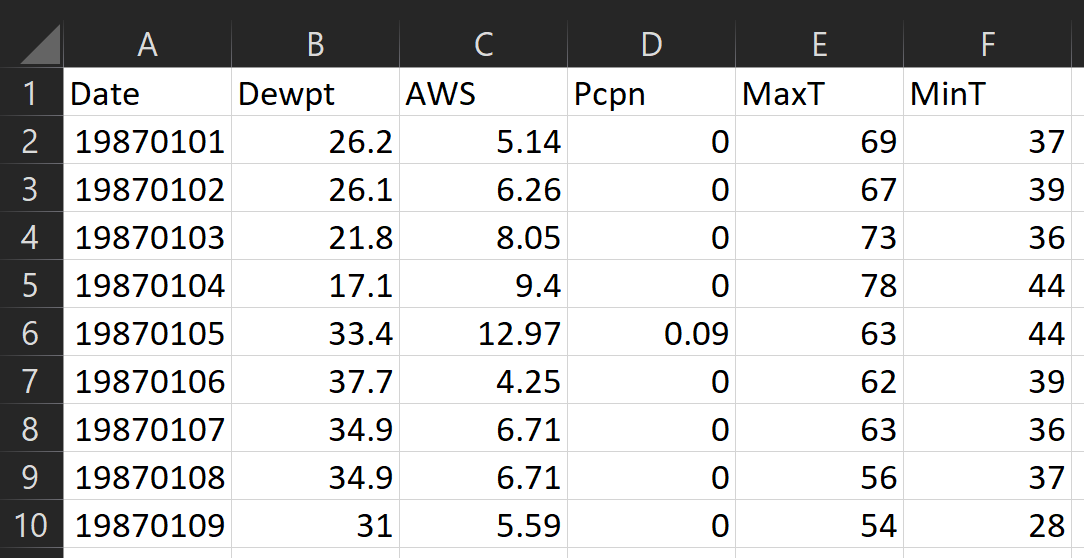

How do we get this into a `DataFrame` so that we can manipulate it?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
books = pd.read_csv('books001.csv', index_col = 0)

In [ ]:
books.head()

The index of our frame is a sequence of instance identifiers. What attribute uniquely identifies an instance here?

Each row of our frame represents an instance. What are the names of the attributes of our instances and where are they stored?

In [ ]:
books.columns

What are the values for the attributes for ISBN 307593312?

In [ ]:
books.loc['307593312']

In [ ]:
books.loc[:, 'Title']

**Question**: why is the ISBN here treated as a string, not an int?

What are the values for the 10th book in the table?

In [ ]:
books.iloc[5:9]

In [ ]:
type(books)

<font color=green>__Data matrix:__</font> We will call a sequence of feature vectors stored one row per vector in a frame a data matrix.

**Question**: How many instances do we have? How can we tell?

In [ ]:
books.shape

Can we get just the textbooks from the data frame?

In [ ]:
books[books['Book Type'] == 'Textbook']

Let's just store this data in its own frame:

In [ ]:
textbooks = books[       books['Book Type'] == 'Textbook'           ]

In [ ]:
textbooks

## Exercises

1. Write a line of code that extracts all the books published before 2000. 

In [ ]:
books[books['Year Published'] < 2000]

2. Write a line of code that extracts just the `Author` of every book whose `Book Type` is `Novel`.

In [ ]:
novels = books['Book Type'] == 'Novel'
books[novels]['Author']

# Visualization

Our main target variable was the book price. What does the distribution look like?

In [ ]:
books['Price'].plot(kind = 'hist', bins = range(0, 110, 5))
plt.show()

What if we try another approach to making a histogram? Let's make a histogram of numbers of pages:

In [ ]:
books.plot(x=None, y='# of Pages', kind = 'hist', bins = range(0, 1300, 100))

Besides a histogram, the next most important kind of plot for us is probably a scatter plot. Let's plot price against number of pages.

In [ ]:
books.plot('# of Pages', 'Price', kind = 'scatter')

More documentation on the different kinds of plot you can make with `DataFrame.plot()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html. You can do more different kinds of things with `matplotlib`, so we'll use that for more complex plots, but for simple histograms, scatter plots, etc. the `pandas` plotting methods are a little easier to use. There are also dedicated methods for certain plot types, such as `hist`.

## Exercises

1. Make a scatter plot of number of pages vs. year published.

2. Make a histogram of prices for only *non-textbook* books.